# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using mouse ID
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

#turn the merged data into a dataframe
mouse_df = pd.DataFrame(merged_data)

#rearrange the columns
mouse_df = mouse_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

# Display the data table for preview
mouse_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
no_mice = len(pd.unique(mouse_df['Mouse ID']))
no_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_mice_df

#create a list of duplicate IDs
duplicate_mice = duplicate_mice_df['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_df.drop(mouse_df.loc[mouse_df['Mouse ID'] == 'g989'].index, inplace=True)
#mouse_df

mouse_df.drop(mouse_df.index[mouse_df['Mouse ID'] == 'g989'], inplace = True)
mouse_df.reset_index(drop=True, inplace=True)
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1875,z969,25,63.145652,2,Naftisol,Male,9,30
1876,z969,30,65.841013,3,Naftisol,Male,9,30
1877,z969,35,69.176246,4,Naftisol,Male,9,30
1878,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
no_mice = len(pd.unique(mouse_df['Mouse ID']))
no_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = mouse_df.groupby(['Drug Regimen'])
mean_tumor_volume_df = mean_tumor_volume.mean()
#mean_tumor_volume_df

median_tumor_volume = mouse_df.groupby(['Drug Regimen'])
median_tumor_volume_df = median_tumor_volume.median()
#median_tumor_volume_df

tumor_volume_variance = mouse_df.groupby(['Drug Regimen'])
tumor_volume_variance_df = tumor_volume_variance.var()
#tumor_volume_variance_df

tumor_volume_std_dev = mouse_df.groupby(['Drug Regimen'])
tumor_volume_std_dev_df = tumor_volume_std_dev.std()
#tumor_volume_std_dev_df

tumor_volume_sem = mouse_df.groupby(['Drug Regimen'])
tumor_volume_sem_df = tumor_volume_sem.sem()
#tumor_volume_sem_df

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(mean_tumor_volume_df['Tumor Volume (mm3)'])
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
summary_df.insert(1,'Median Tumor Volume', median_tumor_volume_df['Tumor Volume (mm3)'])
summary_df.insert(2,'Tumor Volume Variance', tumor_volume_variance_df['Tumor Volume (mm3)'])
summary_df.insert(3,'Tumor Volume Std. Dev.', tumor_volume_std_dev_df['Tumor Volume (mm3)'])
summary_df.insert(4,'Tumor Volume Std. Err.', tumor_volume_sem_df['Tumor Volume (mm3)'])
summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

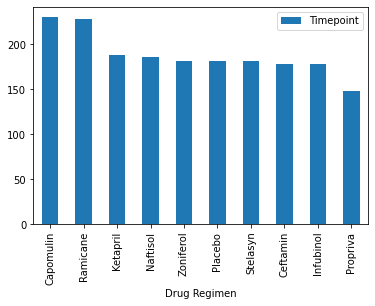

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_by_regimen = mouse_df.copy()
grouped_by_regimen = grouped_by_regimen.groupby('Drug Regimen').count()
grouped_by_regimen = grouped_by_regimen.sort_values("Timepoint", ascending=False)

#Use Pandas to plot
grouped_by_regimen.plot.bar(y='Timepoint')

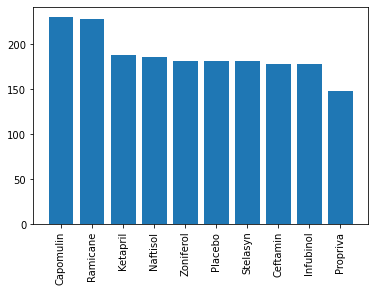

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = grouped_by_regimen.index
y_axis = grouped_by_regimen['Timepoint']

#Use pyploy to plot
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.show()

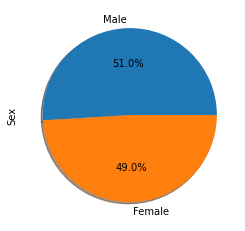

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = mouse_df['Sex'].value_counts().plot(kind="pie",autopct='%1.1f%%', shadow=True)


([<matplotlib.patches.Wedge at 0x7fe9516e70d0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

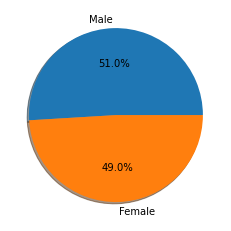

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
x_axis = mouse_df['Sex'].unique()

# The values of each section of the pie chart
y_axis = mouse_df['Sex'].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%", shadow=True)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = mouse_df.copy()
mouse_timepoint_df = pd.DataFrame(mouse_timepoint_df.groupby('Mouse ID')['Timepoint'].max())
merge_df= mouse_timepoint_df.merge(mouse_df, on=['Mouse ID','Timepoint'])
#reseting the index didn't change anything, but adding because instructions said to
merge_df.reset_index(drop=True, inplace=True)
merge_df

# Capomulin, Ramicane, Infubinol, and Ceftamin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#create a list for tumor volume data
tumor_volume_data_dict = dict.fromkeys(treatments, 0)

for drug in treatments:
    #sort merge_df by the drug
    tumor_volume_data_df = merge_df.loc[merge_df['Drug Regimen'] == drug]
    #reset the index
    tumor_volume_data_df.reset_index(drop=True, inplace=True)
    #add drug and tumor volume to dictionary, with drug as key and tumor volume as values
    tumor_volume_data_dict[drug] = tumor_volume_data_df['Tumor Volume (mm3)']
    #calculate IQR
    tumor_volume_quartiles = tumor_volume_data_dict[drug].quantile([.25,.5,.75])
    lowerq = tumor_volume_quartiles[0.25]
    upperq = tumor_volume_quartiles[0.75]
    iqr = upperq-lowerq
    #calculate outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #create list of outliers
    outliers = []
    for value in tumor_volume_data_dict[drug]:
        if (value <= lower_bound) | (value >= upper_bound):
            outliers.append(value)
    #print out list of outliers
    print(drug + f' potential outliers are {outliers}')



Capomulin potential outliers are []
Ramicane potential outliers are []
Infubinol potential outliers are [36.3213458]
Ceftamin potential outliers are []


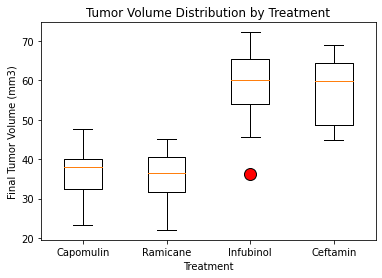

In [15]:
#vol_dict
vol_df = pd.DataFrame(tumor_volume_data_dict)
vol_df

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,linestyle='none')
ax1.boxplot(vol_df, labels=treatments, flierprops=flierprops)
plt.show()


In [16]:
vol_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


## Line and Scatter Plots

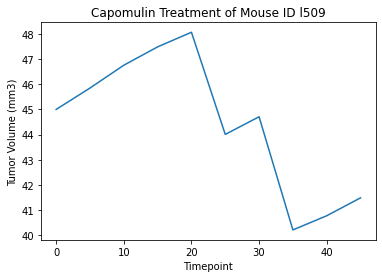

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Get the data for Capomulin only in a dataframe. 
y_axis_df = mouse_df.copy()
y_axis_df = y_axis_df.loc[(y_axis_df['Drug Regimen'] == 'Capomulin') & (y_axis_df['Mouse ID'] == 'l509')]

#y-axis = tumor volume. Convert this data to a list
y_axis = y_axis_df['Tumor Volume (mm3)'].values.tolist()
#y_axis

#x-axis = timepoint Convert this data to a list
x_axis = y_axis_df['Timepoint'].values.tolist()
#x_axis

# Plot the line
plt.plot(x_axis,y_axis)
plt.title("Capomulin Treatment of Mouse ID l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

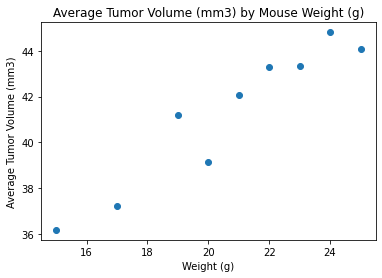

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Get the data for Capomulin only in a dataframe. 
scatter_df = mouse_df.copy()
scatter_df = scatter_df.loc[(scatter_df['Drug Regimen'] == 'Capomulin')]
#group scatter_df by weight and get the average of each column. This gives us the average tumor volume by mouse weight in grams.
weight_df = scatter_df.groupby(['Weight (g)']).mean()

#y-axis = tumor volume. Convert this data in the weight_df to a list. This gives us a list of average tumor volumes. 
scatter_y_axis = weight_df['Tumor Volume (mm3)'].values.tolist()
#scatter_y_axis
#weight_df

#x-axis = timepoint. Convert weight_df's index to a list. Note that the index is the weight (g).
scatter_x_axis = weight_df.index.values.tolist()
#scatter_x_axis

# Plot the line
plt.scatter(scatter_x_axis,scatter_y_axis)
plt.title("Average Tumor Volume (mm3) by Mouse Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


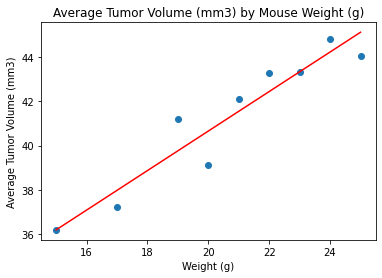

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen

# Compute the Pearson correlation coefficient between "Weight (g)" and "Tumor Volume (mm3)"
correlation = st.pearsonr(scatter_x_axis,scatter_y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Plot the scatter chart
plt.scatter(scatter_x_axis,scatter_y_axis)
plt.title("Average Tumor Volume (mm3) by Mouse Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plot the regression line
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(scatter_x_axis, scatter_y_axis, 1)
#add linear regression line to scatterplot 
plt.plot(scatter_x_axis, m*pd.Series(scatter_x_axis)+b, 'r')

plt.show()

